- Spain is the european country with more delay hours per fly. (1)


- The Barcelona airport is the airport with less delays hours in Spain. (2)


- Vueling is the air carriers with more delays (3)


- The shorter the flight is, the more is likely that it will be delay. (4)


- The average delay time is Spain is longer than in Germany. (5)


Your are more likely to have a delay flight because of the carrier rather than from weather conditions.

Legacy carriers flights are less likely to be delay than low cost carriers flights.

US airlines are less likely to be delay than the european counterparts.

In [193]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import seaborn as sns
import datetime as dt
sns.set()

In [226]:
driver = 'mysql+pymysql:'
user = 'root'
password = '19693903'
ip = '127.0.0.1'
database = 'project_4'

In [227]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [228]:
query = """
SELECT *
FROM flights
"""

In [229]:
data = pd.read_sql(query, engine)


In [230]:
data.head()

,airln_name,airln_code,type,codeshared,status,icaonumb,flight,depart_terminal,depart_gate,depart_airpt,schd_depart_time,depart_delay,arri_airpt,schd_arri_time,arri_delay
0,Binter Canarias,NT,departure,None,landed,IBB503,503,2,3,ACE,2019-07-25 07:00:00,0,LPA,2019-07-25 07:45:00,0
1,Ryanair,FR,departure,None,landed,RYR1345,1345,1,2,ACE,2019-07-25 07:45:00,0,SNN,2019-07-25 11:40:00,0
2,Binter Canarias,NT,departure,None,landed,IBB501,501,2,4,ACE,2019-07-25 08:15:00,0,LPA,2019-07-25 09:00:00,0
3,Ryanair,FR,departure,None,landed,RYR3547,3547,1,4,ACE,2019-07-25 08:20:00,0,MAD,2019-07-25 11:55:00,0
4,Binter Canarias,NT,departure,Canarias Airlines,landed,IBB453,453,2,3,ACE,2019-07-25 08:25:00,0,TFN,2019-07-25 09:15:00,0


In [231]:
### Deleate duplicates

data = data.drop_duplicates(subset = ['flight','depart_terminal','schd_depart_time', 'depart_delay', \
                              'schd_arri_time', 'arri_delay'], keep='first')

In [232]:
data = data.astype({'depart_delay': int,'arri_delay':int})

In [8]:
style.use('seaborn-notebook')

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11823 entries, 0 to 16916
Data columns (total 15 columns):
airln_name          11823 non-null object
airln_code          11823 non-null object
type                11823 non-null object
codeshared          7812 non-null object
status              11823 non-null object
icaonumb            11791 non-null object
flight              11823 non-null object
depart_terminal     8718 non-null object
depart_gate         9407 non-null object
depart_airpt        11823 non-null object
schd_depart_time    11822 non-null datetime64[ns]
depart_delay        11823 non-null int64
arri_airpt          11823 non-null object
schd_arri_time      11822 non-null datetime64[ns]
arri_delay          11823 non-null int64
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 1.4+ MB


# Visualizing the relation between my numerical random variables

## Descriptive statistics of the delays in minutes

In [234]:
df_delays = data[['depart_delay', 'arri_delay']]

In [235]:
df_delays =  df_delays[np.logical_and(df_delays['depart_delay']>0, df_delays['arri_delay']>0)]

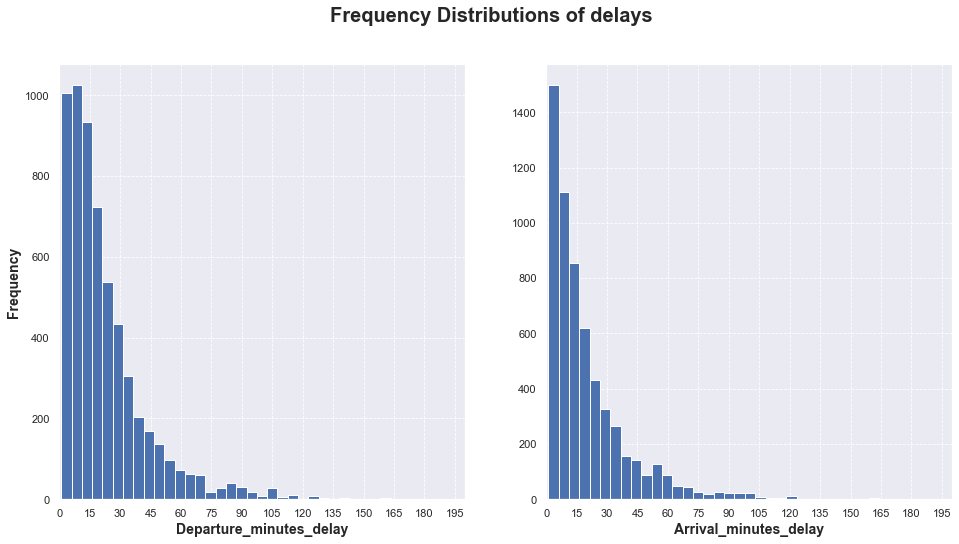

In [236]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of delays', fontweight = 900, fontsize = 20)

ax1.hist(df_delays.depart_delay,bins=40)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xlim([0, 200])

ax1.set_xticks(np.arange(0, 200,15))

ax2.hist(df_delays.arri_delay, bins=40)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xlim([0, 200])

ax2.set_xticks(np.arange(0, 200,15))

plt.show()

### Plotting the summary statistics of the delay variable

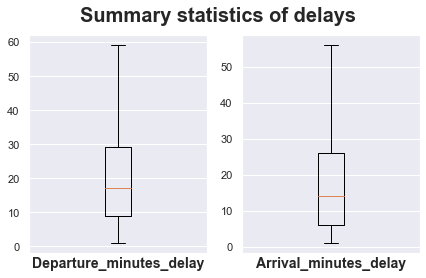

In [237]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[7,4])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Summary statistics of delays', fontweight = 900, fontsize = 20)

ax1.boxplot(df_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax1.set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1.set_xticks([])

ax2.boxplot(df_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2.set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2.set_xticks([])

plt.show()

In [238]:
df_delays.describe()

,depart_delay,arri_delay
count,5975.000000,5975.00000
mean,22.634310,20.04636
std,20.634089,20.20713
min,1.000000,1.00000
25%,9.000000,6.00000
50%,17.000000,14.00000
75%,29.000000,26.00000
max,204.000000,205.00000


## Descriptive statistics of the time in hours of the day

In [239]:
depart_hours = data['schd_depart_time'].dt.hour
arri_hours = data['schd_arri_time'].dt.hour

In [240]:
df_hours_eu = pd.DataFrame([depart_hours, arri_hours])

In [241]:
df_hours_eu = df_hours_eu.transpose()

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


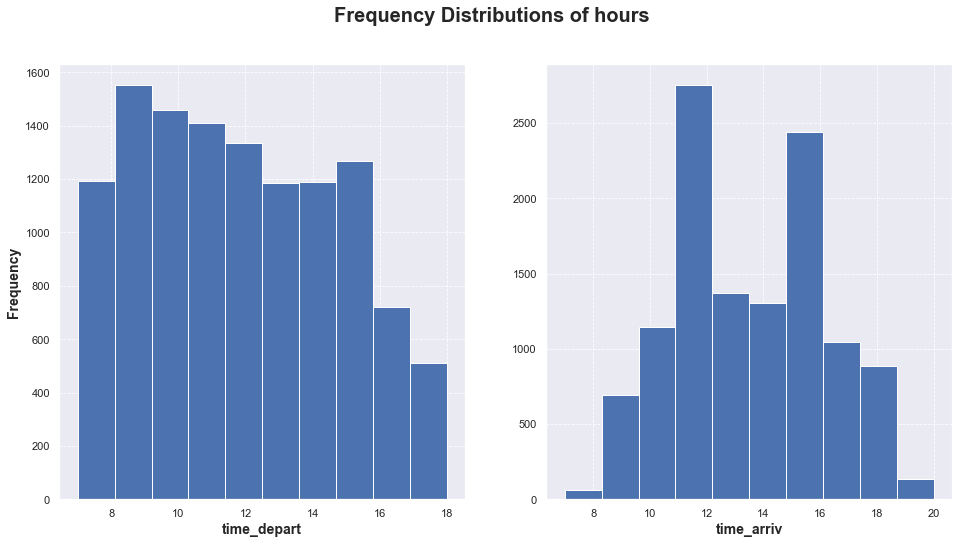

In [242]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of hours', fontweight = 900, fontsize = 20)

ax1.hist(depart_hours)
ax1.set_xlabel('time_depart',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)

ax2.hist(arri_hours)
ax2.set_xlabel('time_arriv',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
plt.show()

In [243]:
df_hours_eu.describe()

,schd_depart_time,schd_arri_time
count,11822.000000,11822.000000
mean,11.918288,13.529775
std,2.646616,2.721345
min,7.000000,7.000000
25%,10.000000,11.000000
50%,12.000000,13.000000
75%,14.000000,16.000000
max,18.000000,20.000000


### Airlines distributions (main airlines of europe)

In [244]:
eu_airlines = data.groupby('airln_name').count()

In [245]:
eu_airlines = eu_airlines.sort_values(by=['airln_code'],ascending=False).drop(eu_airlines.iloc[:,1:], axis=1).\
rename(columns = {'airln_code':'total_count'}).reset_index(drop=False)


In [246]:
eu_airlines_top = eu_airlines[eu_airlines['total_count']>200]

In [247]:
eu_airlines_top['per'] = eu_airlines_top['total_count'] / eu_airlines_top['total_count'].sum()

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


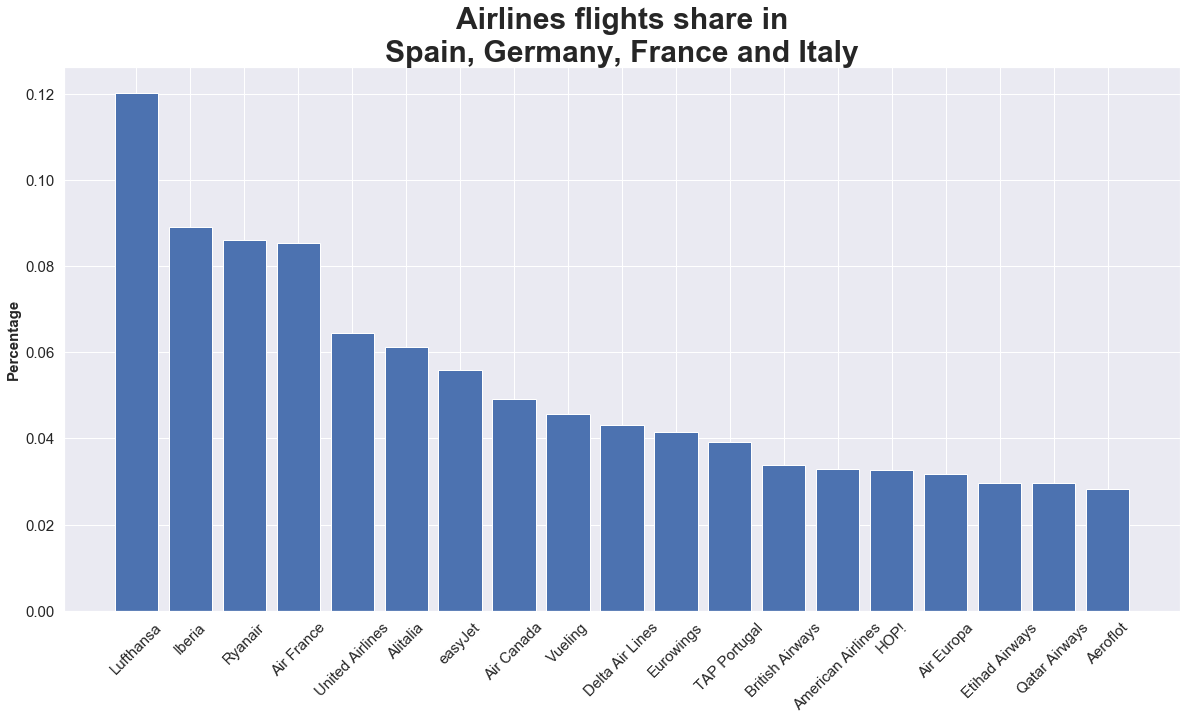

<Figure size 864x864 with 0 Axes>

In [248]:
plt.figure(figsize=(20,10))
plt.bar(eu_airlines_top.airln_name, eu_airlines_top.per)
plt.title("Airlines flights share in\nSpain, Germany, France and Italy",  fontweight = 900, fontsize = 30)
plt.ylabel('Percentage',  fontweight = 900, fontsize = 15)


plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.figure(figsize=(12,12))
plt.show()

In [249]:
eu_airlines.describe()

,total_count
count,148.000000
mean,79.885135
std,137.213500
min,1.000000
25%,4.000000
50%,25.000000
75%,82.000000
max,860.000000


In [ ]:
datetime.strftime

## Delay by weekday

In [250]:
import datetime as dt

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data ['weekday'] = data['schd_depart_time'].dt.dayofweek.map(dayOfWeek)


In [251]:
eu_delay_day = data.groupby('weekday').mean().reset_index(drop=False)
eu_delay_day.head()

,weekday,depart_delay,arri_delay
0,Thursday,12.803671,11.200643


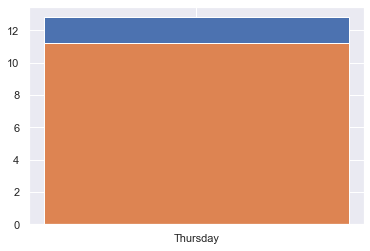

In [252]:

width = 0.35  # the width of the bars


plt.bar(eu_delay_day.weekday, eu_delay_day.depart_delay, width, label='departure')
plt.bar(eu_delay_day.weekday, eu_delay_day.arri_delay, width, label='arrivals')

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.show()

ax.set_ylabel('Mean delays in minutes')
ax.set_title('Mean delays by departure and arrivals')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


In [ ]:
ax.set_ylabel('Mean delays in minutes')
ax.set_title('Mean delays by departure and arrivals')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


## Relation between random variables

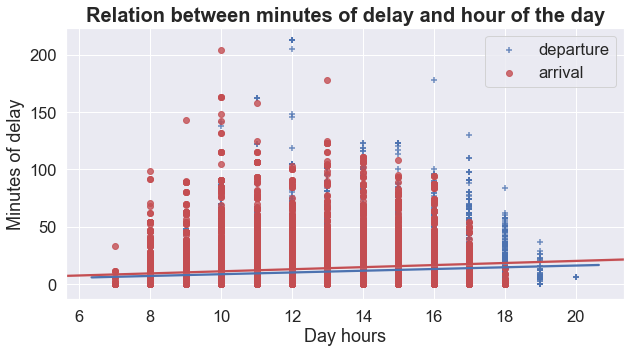

In [323]:
sns.set(font_scale=1.5)

fig,ax = plt.subplots(figsize=(10,5))

ax2 =sns.regplot(arri_hours, data.arri_delay, fit_reg=True, color='b', marker="+", label='departure')
ax1 = sns.regplot(depart_hours, data.depart_delay, fit_reg=True, color='r', label='arrival')

ax1.set(ylabel='Minutes of delay', xlabel='Day hours')
plt.title('Relation between minutes of delay and hour of the day',fontweight = 900, fontsize = 20)
ax.legend()

plt.show()

In [268]:
#test = data.schd_depart_time.dt.strftime('%H:%M')